# Cooking Appliances

Some appliances load profiles, highly depend on the user choices and preferences. For example, electric stoves power usage, highly depends on the type of food and that a user wants to cook. This kind of appliances in RAMP are flagged by the user category consumption preferences.

In this example, we will see how the electric cookstoves with multiple user preferences can be modelled in RAMP.

To have a better understanding of RAMP features for modelling this category of appliances, two households are considered:

1. A household with a fixed lunch habit of eating soup every day.
2. A household with two lunch preferences: cooking soup or rice.

The number of user preferences can be specified through **"user_preference"** parameter when initializing a **User** instance.

In [1]:
# importing functions
from ramp import User, UseCase
import pandas as pd
import matplotlib.pyplot as plt

### Creating a user category 

In [2]:
user_1 = User(
    user_name="Household with single lunch habit",
    num_users=1,
    user_preference=1,  # user_1 has only one consumption preference
)

user_2 = User(
    user_name="Household with different lunch habits",
    num_users=1,
    user_preference=2,  # user_2 has two consumption preferences
)

### Defining the cycles for cooking soup and rice 

For cookstoves, it will be more realistic to have different operation cycles as cooking a food usually requires different levels of heat for the different parts of food processing:

For cooking soup it is assumed that the user needs 25 minutes divided into two parts:

| cycle         | power | time |
|---------------|-------|------|
| Boiling Water | 1200  | 5    |
| Cooking soup  | 750   | 20   |

For cooking rice it is assumed that the user needs 15 minutes divided into two parts:

| cycle         | power | time |
|---------------|-------|------|
| Boiling Water | 1200  | 5    |
| Cooking rice  | 600   | 10   |



In [3]:
# soup for lunch
lunch_window = [12 * 60, 12 * 60 + 26]

soup_1 = user_1.add_appliance(
    name="soup for lunch",
    power=1200,  # nominal power of appliance
    func_time=25,  # the cooking time
    func_cycle=25,  # we always need  25 minute for cooking
    fixed_cycle=1,  # the cookstove is not a continus power usage appliance, it has cycles as mentioned earlier
    window_1=lunch_window,  # lunch is always prepared from 12
    p_11=1200,  # power of the first cycle
    t_11=5,  # time needed for the first cycle
    p_12=750,  # power of the second cycle
    t_12=20,  # time needed for the second cycle
    cw11=lunch_window,  # the time window of the working cycle
)

The second user has two different preferences for lunch. Accordingly, we need to model
these preferences and their characteristics as two different appliances.

Each preference needs to be specified with its associated cooking energy needs, such as
the power, functioning time and the duty cycles of the cooking process.

More importantly, for each preference, the user needs to specify the
index of preference by using the **pref_index** parameter. In this example,
soup is the first preference of the user (pref_index = 1), and rice is
the second one (pref_index = 2).

In [4]:
# soup for lunch
soup_2 = user_2.add_appliance(
    name="soup for lunch",
    power=1200,
    func_time=25,
    func_cycle=25,
    fixed_cycle=1,
    window_1=lunch_window,
    p_11=1200,  # power of the first cycle
    t_11=5,  # time needed for the first cycle
    p_12=750,  # power of the second cycle
    t_12=20,  # time needed for the second cycle
    cw11=lunch_window,
    pref_index=1,  # the first preference
)

In [5]:
# rice for lunch
rice_2 = user_2.add_appliance(
    name="rice for lunch",
    power=1200,
    func_time=15,
    func_cycle=15,
    fixed_cycle=1,
    window_1=lunch_window,
    p_11=1200,  # power of the first cycle
    t_11=5,  # time needed for the first cycle
    p_12=600,  # power of the second cycle
    t_12=10,  # time needed for the second cycle
    cw11=lunch_window,
    pref_index=2,  # the second preference
)

In [6]:
number_of_days = 5
user_1_profiles = {}
user_2_profiles = {}
for day in range(1, number_of_days + 1):
    user_1_profiles[f"day {day}"] = pd.Series(user_1.generate_single_load_profile())
    user_2_profiles[f"day {day}"] = pd.Series(user_2.generate_single_load_profile())

You are generating ramp demand from a User not bounded to a UseCase instance, a default one has been created for you 
You are generating ramp demand from a User not bounded to a UseCase instance, a default one has been created for you 


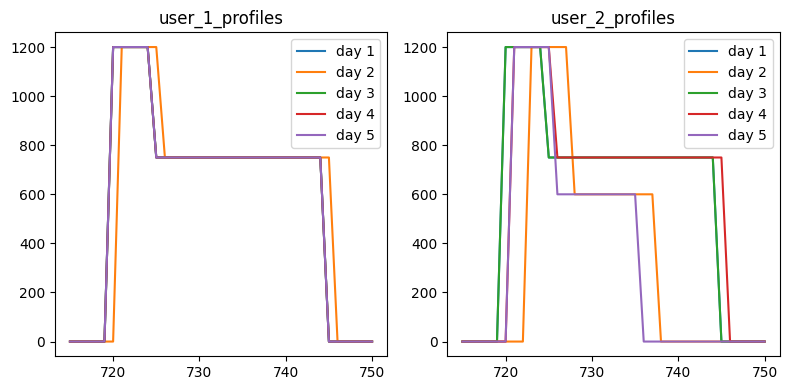

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))


i = 0
for name, df in dict(
    user_1_profiles=pd.concat(user_1_profiles, axis=1).iloc[
        lunch_window[0] - 5 : lunch_window[1] + 5
    ],  # take only the lunch window
    user_2_profiles=pd.concat(user_2_profiles, axis=1).iloc[
        lunch_window[0] - 5 : lunch_window[1] + 5
    ],  # take only the lunch window
).items():
    df.plot(ax=axes[i], legend=True)
    axes[i].set_title(name)
    i += 1

plt.tight_layout()
plt.show()

As it can be observed, user_1 always have the same demand profile for lunch prepration while user_2 can have two different profiles (for example on day 3 and 4, the user cooks rice for lunch)!